In [5]:
!pip install kagglehub pdf2image opencv-python matplotlib numpy
!apt-get install poppler-utils -y


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
poppler-utils is already the newest version (22.02.0-2ubuntu0.11).
0 upgraded, 0 newly installed, 0 to remove and 38 not upgraded.


In [6]:
import kagglehub
import os
import random
from pdf2image import convert_from_path

# Step 1 – Download Resume Dataset
path = kagglehub.dataset_download("snehaanbhawal/resume-dataset")
print("Path to dataset files:", path)

# Step 2 – Collect all PDF resumes
pdf_files = []
for root, dirs, files in os.walk(path):
    for file in files:
        if file.lower().endswith(".pdf"):
            pdf_files.append(os.path.join(root, file))

print(f"Total PDF resumes found: {len(pdf_files)}")

# Step 3 – Pick 20 random resumes
selected_pdfs = random.sample(pdf_files, min(20, len(pdf_files)))
print("\nRandomly selected resumes:\n")
for f in selected_pdfs:
    print(f)

# Step 4 – Convert each selected PDF to images
output_dir = "resume_images"
os.makedirs(output_dir, exist_ok=True)

for pdf_path in selected_pdfs:
    try:
        images = convert_from_path(pdf_path)
        base_name = os.path.splitext(os.path.basename(pdf_path))[0]
        for i, img in enumerate(images):
            img_filename = os.path.join(output_dir, f"{base_name}_page_{i+1}.jpg")
            img.save(img_filename, "JPEG")
        print(f"Converted {pdf_path} → images successfully.")
    except Exception as e:
        print(f"Error converting {pdf_path}: {e}")

print(f"\nAll images saved in: {output_dir}")


Using Colab cache for faster access to the 'resume-dataset' dataset.
Path to dataset files: /kaggle/input/resume-dataset
Total PDF resumes found: 2484

Randomly selected resumes:

/kaggle/input/resume-dataset/data/data/AGRICULTURE/55500538.pdf
/kaggle/input/resume-dataset/data/data/DIGITAL-MEDIA/31909493.pdf
/kaggle/input/resume-dataset/data/data/AUTOMOBILE/82140102.pdf
/kaggle/input/resume-dataset/data/data/DESIGNER/23951429.pdf
/kaggle/input/resume-dataset/data/data/ENGINEERING/47549345.pdf
/kaggle/input/resume-dataset/data/data/TEACHER/12467531.pdf
/kaggle/input/resume-dataset/data/data/CHEF/20321582.pdf
/kaggle/input/resume-dataset/data/data/HEALTHCARE/37001381.pdf
/kaggle/input/resume-dataset/data/data/HR/52979663.pdf
/kaggle/input/resume-dataset/data/data/BUSINESS-DEVELOPMENT/11289482.pdf
/kaggle/input/resume-dataset/data/data/CHEF/21334981.pdf
/kaggle/input/resume-dataset/data/data/DIGITAL-MEDIA/82929064.pdf
/kaggle/input/resume-dataset/data/data/DESIGNER/27497542.pdf
/kaggle/in

In [7]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os

def display_image(image, title="Image"):
    plt.figure(figsize=(8,8))
    if len(image.shape) == 2:  # grayscale
        plt.imshow(image, cmap='gray')
    else:
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.axis('off')
    plt.show()


In [8]:
# Convert to grayscale
def convert_to_grayscale(image):
    return cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Reduce noise with Gaussian Blur
def reduce_noise(gray_image):
    return cv2.GaussianBlur(gray_image, (5, 5), 0)

# Binarize using adaptive threshold
def binarize_image(blur_image):
    return cv2.adaptiveThreshold(
        blur_image, 255,
        cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
        cv2.THRESH_BINARY,
        11, 4
    )

# Deskew image to correct rotation
def deskew_image(image):
    coords = cv2.findNonZero(image)
    rect = cv2.minAreaRect(coords)
    angle = rect[-1] - 90
    if angle < -45:
        angle = -(90 + angle)
    (h, w) = image.shape[:2]
    center = (w // 2, h // 2)
    M = cv2.getRotationMatrix2D(center, angle, 1.0)
    rotated = cv2.warpAffine(image, M, (w, h),
                             flags=cv2.INTER_CUBIC,
                             borderMode=cv2.BORDER_REPLICATE)
    print(f"Detected skew angle: {angle:.2f}°")
    return rotated


In [9]:
image_files = [os.path.join("resume_images", f) for f in os.listdir("resume_images") if f.endswith(".jpg")]
print(f"Total images to process: {len(image_files)}")

preprocessed_dir = "preprocessed_images"
os.makedirs(preprocessed_dir, exist_ok=True)

for img_path in image_files:
    image = cv2.imread(img_path)

    gray = convert_to_grayscale(image)
    blur = reduce_noise(gray)
    bin_img = binarize_image(blur)
    deskewed = deskew_image(bin_img)

    # Save final preprocessed image
    save_path = os.path.join(preprocessed_dir, os.path.basename(img_path))
    cv2.imwrite(save_path, deskewed)

    print(f"Preprocessed and saved: {save_path}")

print("\n✅ All 20 resumes preprocessed and deskewed.")


Total images to process: 73
Detected skew angle: 0.00°
Preprocessed and saved: preprocessed_images/12467531_page_2.jpg
Detected skew angle: 0.00°
Preprocessed and saved: preprocessed_images/12488356_page_2.jpg
Detected skew angle: 0.00°
Preprocessed and saved: preprocessed_images/25608963_page_1.jpg
Detected skew angle: 0.00°
Preprocessed and saved: preprocessed_images/31909493_page_1.jpg
Detected skew angle: 0.00°
Preprocessed and saved: preprocessed_images/28419173_page_1.jpg
Detected skew angle: 0.00°
Preprocessed and saved: preprocessed_images/24643412_page_2.jpg
Detected skew angle: 0.00°
Preprocessed and saved: preprocessed_images/16511249_page_3.jpg
Detected skew angle: 0.00°
Preprocessed and saved: preprocessed_images/52979663_page_1.jpg
Detected skew angle: 0.00°
Preprocessed and saved: preprocessed_images/28419173_page_2.jpg
Detected skew angle: 0.00°
Preprocessed and saved: preprocessed_images/26459032_page_1.jpg
Detected skew angle: 0.00°
Preprocessed and saved: preprocesse

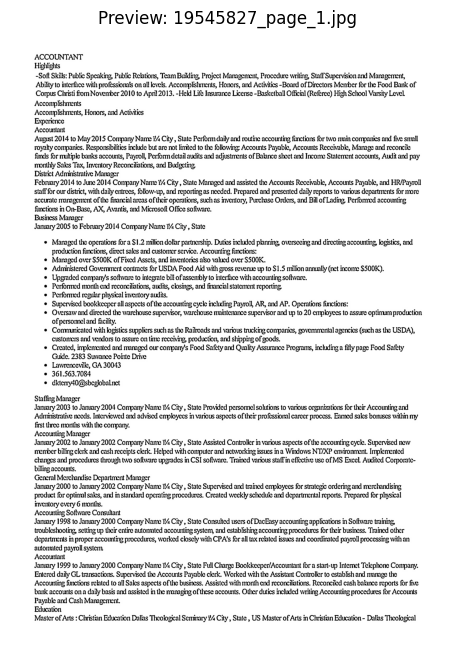

In [10]:
sample = random.choice(os.listdir(preprocessed_dir))
image = cv2.imread(os.path.join(preprocessed_dir, sample), cv2.IMREAD_GRAYSCALE)
display_image(image, f"Preview: {sample}")


In [11]:
!pip install pytesseract pillow
!apt-get install tesseract-ocr -y


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
tesseract-ocr is already the newest version (4.1.1-2.1build1).
0 upgraded, 0 newly installed, 0 to remove and 38 not upgraded.


In [12]:
from PIL import Image
import pytesseract
import os
import time

# Define input (preprocessed) and output folders
input_folder_path = "/content/preprocessed_images"   # folder from previous preprocessing step
output_folder_path = "/content/tesseract_output"

# Create output folder if not exists
os.makedirs(output_folder_path, exist_ok=True)
print(f"Output folder ready: {output_folder_path}")

# Count total images
total_images = len([f for f in os.listdir(input_folder_path) if f.lower().endswith('.jpg')])
print(f"Total images in folder: {total_images}")


Output folder ready: /content/tesseract_output
Total images in folder: 73


In [14]:
start_time = time.time()

for i, image_name in enumerate(os.listdir(input_folder_path)[:20], 1):  # limit to 20
    image_path = os.path.join(input_folder_path, image_name)
    print(f"\nProcessing image {i}/{total_images}: {image_name}")

    # Open and extract text using Tesseract
    try:
        text = pytesseract.image_to_string(Image.open(image_path))
    except Exception as e:
        print(f"Error processing {image_name}: {e}")
        continue

    # Save extracted text
    output_path = os.path.join(output_folder_path, image_name.replace(".jpg", ".txt"))
    with open(output_path, "w", encoding="utf-8") as f:
        f.write(text)

    print(f"✅ Saved extracted text to: {output_path}")
    print("-" * 60)

print("\n🟢 Text extraction completed successfully.")
print(f"Total time taken: {time.time() - start_time:.2f} seconds")



Processing image 1/73: 12467531_page_2.jpg
✅ Saved extracted text to: /content/tesseract_output/12467531_page_2.txt
------------------------------------------------------------

Processing image 2/73: 12488356_page_2.jpg
✅ Saved extracted text to: /content/tesseract_output/12488356_page_2.txt
------------------------------------------------------------

Processing image 3/73: 25608963_page_1.jpg
✅ Saved extracted text to: /content/tesseract_output/25608963_page_1.txt
------------------------------------------------------------

Processing image 4/73: 31909493_page_1.jpg
✅ Saved extracted text to: /content/tesseract_output/31909493_page_1.txt
------------------------------------------------------------

Processing image 5/73: 28419173_page_1.jpg
✅ Saved extracted text to: /content/tesseract_output/28419173_page_1.txt
------------------------------------------------------------

Processing image 6/73: 24643412_page_2.jpg
✅ Saved extracted text to: /content/tesseract_output/24643412_page

In [15]:
sample_txt = random.choice(os.listdir(output_folder_path))
with open(os.path.join(output_folder_path, sample_txt), 'r', encoding='utf-8') as f:
    print(f"\n--- Sample OCR Output: {sample_txt} ---\n")
    print(f.read()[:1000])  # show first 1000 characters



--- Sample OCR Output: 12467531_page_2.txt ---

Evernote, Shek, Social Media, Excel, Outlook, Adobe Photoshop
Management: Staff, Projects, Daily Scheduling

Financial Analysis, Security Trading, Portfolio Managament, Liability Structuring
Research, Analysis, and Planning

Work History
Teacher , 08/2014 to Current
Company Name 4€“ City , State

Teaches classes in accordance with requirements of approved courses of study at expected student progress expectations

Uses information about individual students’ academic strengths, needs, and progress in planning

Designs activities to engage students in cognitively challenging work aligned to standards

Uses resources that will promote high levels of leaming and student engagement in classroom enviromrent

Closely monitors student leaning in order to understand how students are progressing toward keamning objectives and provides students with
instructive timely feedback that moves their leaming forward

Establishes classroom enviroment that 

In [16]:
prompt = """
###ROLE###
You are a world-class resume parsing and information extraction specialist. You are an expert in reading resumes (PDFs converted to images, preprocessed and OCR-extracted) and extracting key candidate information accurately.

###CONTEXT###
The user has preprocessed scanned resume images using OpenCV (grayscale, noise reduction, binarization, deskewing) and extracted raw text using Tesseract OCR. The extracted text may contain OCR errors. Your task is to process this text and extract relevant candidate information for structured analysis.

###TASK###
1. Read the provided OCR-extracted text carefully.
2. Identify and extract the following information:
   - Full Name
   - Email Address
   - Phone Number
   - Skills
   - Education (degrees, institutions, graduation years)
   - Work Experience (company names, roles, durations)
3. Correct any obvious OCR mistakes while extracting information.
4. Include only the information that can be confidently determined from the text.
5. Respond ONLY with the requested information in the specified structured format.

###CONSTRAINTS###
- Do not include any commentary or extra explanations.
- Output must strictly follow the JSON format below.
- Correct obvious OCR errors, but do not invent information.
- If a field is missing or cannot be determined, leave it as an empty string.
- Keep formatting consistent across all resumes.

###EXAMPLES###
Example Input Text:
"John Doe\nEmail: john.doe@gmail.com\nPhone: +1 123 456 7890\nSkills: Python, SQL, Machine Learning\nEducation: BSc Computer Science, XYZ University, 2022\nWork: Data Scientist at ABC Corp, 2022-2023"

Expected Output:
{
    "name": "John Doe",
    "email": "john.doe@gmail.com",
    "phone": "+1 123 456 7890",
    "skills": "Python, SQL, Machine Learning",
    "education": "BSc Computer Science, XYZ University, 2022",
    "experience": "Data Scientist at ABC Corp, 2022-2023"
}

###OUTPUT FORMAT###
Provide the output exactly in JSON with these keys:
{
    "name": "FULL_NAME",
    "email": "EMAIL_ADDRESS",
    "phone": "PHONE_NUMBER",
    "skills": "SKILLS",
    "education": "EDUCATION",
    "experience": "WORK_EXPERIENCE"
}

###USER INPUT###
Here is the OCR-extracted text from the processed resume image:

{ocr_text_here}
"""


In [17]:
from google import genai
from google.colab import userdata  # Colab only
from PIL import Image
import json
import time
import os

# Initialize GenAI client
genai_client = genai.Client(api_key=userdata.get('GOOGLE_API_KEY'))

# Folder paths
image_folder_path = "/content/preprocessed_images"   # Preprocessed images
text_folder_path = "/content/tesseract_output"      # OCR text
output_folder_path = "/content/json_output"         # Final JSON outputs
os.makedirs(output_folder_path, exist_ok=True)
print(f"Output folder ready: {output_folder_path}")

# Get 20 images
selected_images = os.listdir(image_folder_path)[:20]
total_images = len(selected_images)
print(f"Total images to process: {total_images}")

# Resume-specific prompt template
resume_prompt_template = """
###ROLE###
You are a world-class resume parsing and information extraction specialist. You are an expert in reading resumes (PDFs converted to images, preprocessed and OCR-extracted) and extracting key candidate information accurately.

###CONTEXT###
The user has preprocessed scanned resume images using OpenCV (grayscale, noise reduction, binarization, deskewing) and extracted raw text using Tesseract OCR. The extracted text may contain OCR errors. Your task is to process this text and extract relevant candidate information for structured analysis.

###TASK###
1. Read the provided OCR-extracted text carefully.
2. Identify and extract the following information:
   - Full Name
   - Email Address
   - Phone Number
   - Skills
   - Education (degrees, institutions, graduation years)
   - Work Experience (company names, roles, durations)
3. Correct any obvious OCR mistakes while extracting information.
4. Include only the information that can be confidently determined from the text.
5. Respond ONLY with the requested information in the specified structured format.

###CONSTRAINTS###
- Do not include commentary or extra explanations.
- Output must strictly follow the JSON format below.
- Correct obvious OCR errors, but do not invent information.
- If a field is missing or cannot be determined, leave it as an empty string.

###OUTPUT FORMAT###
{
    "name": "FULL_NAME",
    "email": "EMAIL_ADDRESS",
    "phone": "PHONE_NUMBER",
    "skills": "SKILLS",
    "education": "EDUCATION",
    "experience": "WORK_EXPERIENCE"
}

###USER INPUT###
Here is the OCR-extracted text from the processed resume image:

{ocr_text_here}
"""

# Start timer
start_time = time.time()

# Loop over each selected image
for i, image_name in enumerate(selected_images, 1):
    print(f"\nProcessing image {i}/{total_images}: {image_name}")

    # Load image
    image_path = os.path.join(image_folder_path, image_name)
    with Image.open(image_path) as img:
        image = img.convert("RGB")  # ensure RGB
    print(f"Loaded image: {image_path}")

    # Load OCR-extracted text
    text_path = os.path.join(text_folder_path, image_name.replace(".jpg", ".txt"))
    with open(text_path, "r", encoding="utf-8") as f:
        ocr_text = f.read()
    print(f"Loaded OCR text: {text_path}")

    # Create full prompt for GenAI
    prompt = resume_prompt_template.replace("{ocr_text_here}", ocr_text)

    # Call GenAI API
    response = genai_client.models.generate_content(
        model='gemini-2.5-flash',
        contents=[
            image,        # pass the preprocessed image
            {"text": prompt}  # pass the prompt with OCR text
        ]
    )

    # Access usage info
    usage_metadata = response.usage_metadata
    print(f"Input Token Count: {usage_metadata.prompt_token_count}")
    print(f"Thoughts Token Count: {usage_metadata.thoughts_token_count}")
    print(f"Output Token Count: {usage_metadata.candidates_token_count}")
    print(f"Total Token Count: {usage_metadata.total_token_count}")

    # Parse and save JSON output
    try:
        extracted_information = json.loads(response.text.replace('```json', '').replace('```', ''))
    except json.JSONDecodeError as e:
        print(f"⚠️ JSON parsing error for {image_name}: {e}")
        extracted_information = {}

    output_path = os.path.join(output_folder_path, image_name.replace(".jpg", ".json"))
    with open(output_path, "w", encoding="utf-8") as f:
        json.dump(extracted_information, f, indent=4)

    print(f"✅ Saved extracted information to {output_path}")
    print("-"*60)

    # Optional: wait to avoid rate limits
    time.sleep(5)  # reduced from 60s for Colab testing; adjust if needed

print("\n🟢 Information Extraction Completed.")
print(f"Total time taken: {time.time() - start_time:.2f} seconds")


Output folder ready: /content/json_output
Total images to process: 20

Processing image 1/20: 12467531_page_2.jpg
Loaded image: /content/preprocessed_images/12467531_page_2.jpg
Loaded OCR text: /content/tesseract_output/12467531_page_2.txt
Input Token Count: 1215
Thoughts Token Count: 522
Output Token Count: 739
Total Token Count: 2476
✅ Saved extracted information to /content/json_output/12467531_page_2.json
------------------------------------------------------------

Processing image 2/20: 12488356_page_2.jpg
Loaded image: /content/preprocessed_images/12488356_page_2.jpg
Loaded OCR text: /content/tesseract_output/12488356_page_2.txt
Input Token Count: 1148
Thoughts Token Count: 1341
Output Token Count: 267
Total Token Count: 2756
✅ Saved extracted information to /content/json_output/12488356_page_2.json
------------------------------------------------------------

Processing image 3/20: 25608963_page_1.jpg
Loaded image: /content/preprocessed_images/25608963_page_1.jpg
Loaded OCR tex


📄 Resume Image: 12467531_page_2.jpg


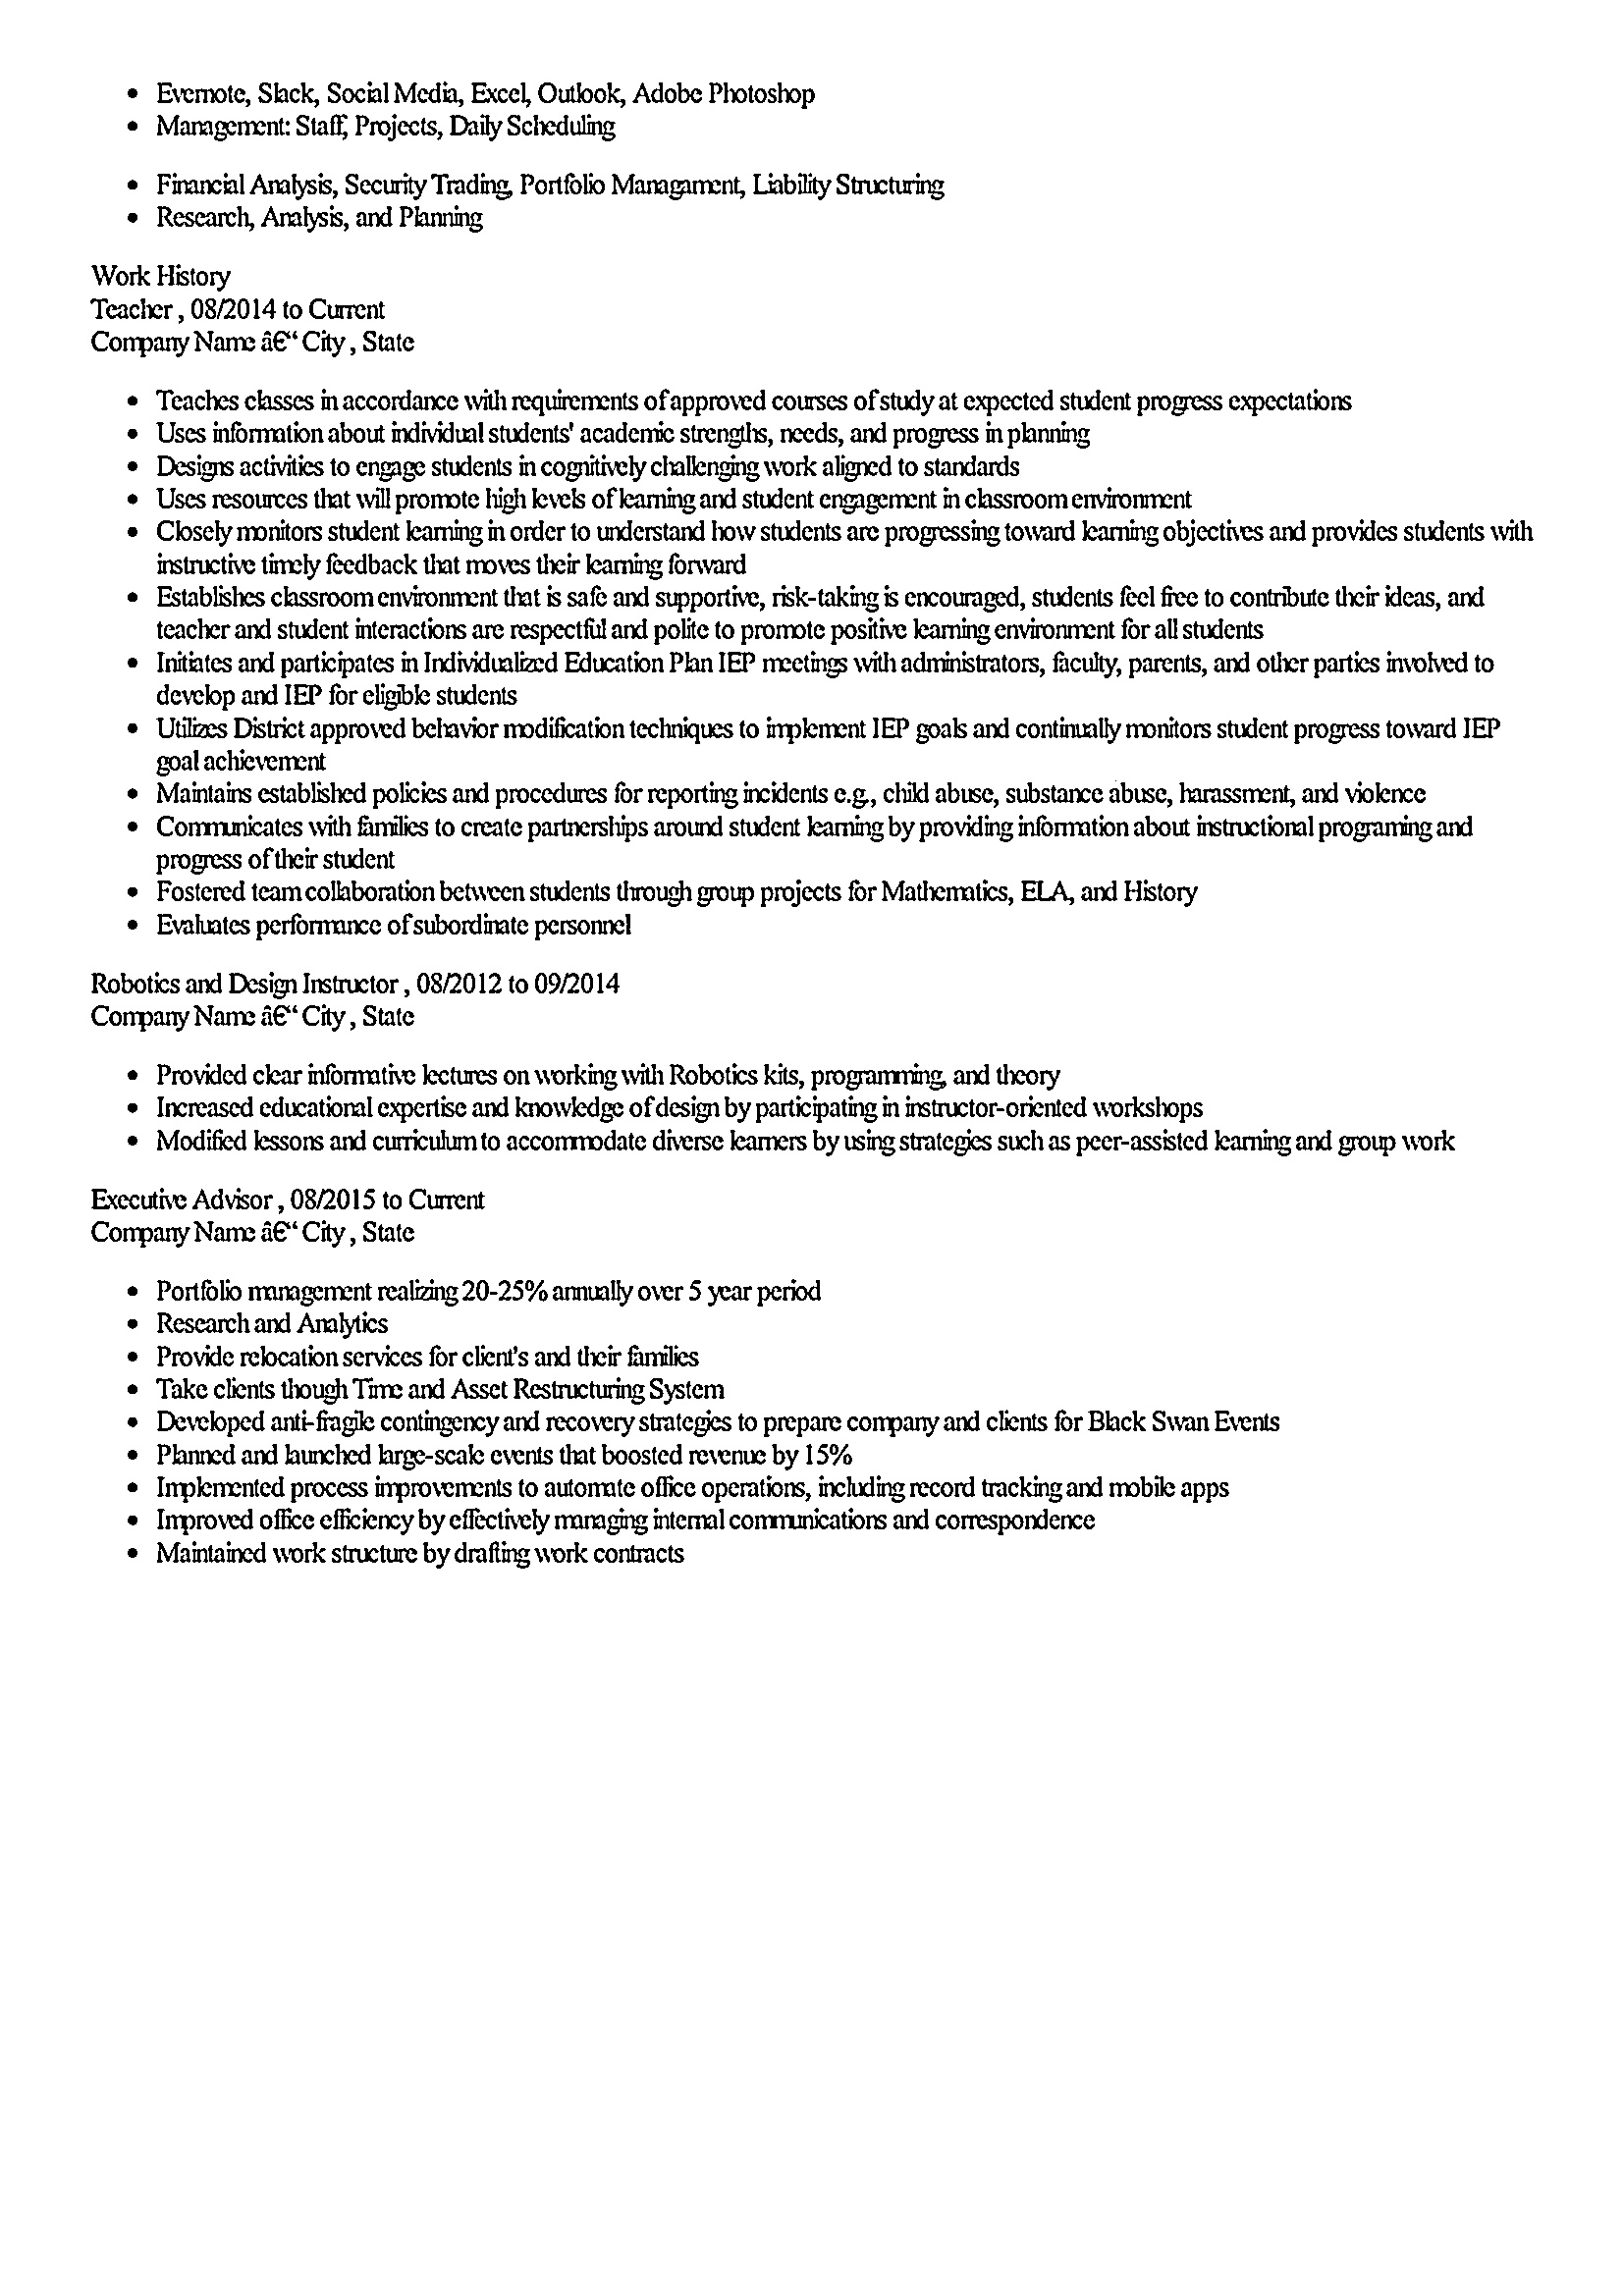

📝 Extracted Information:
{
    "name": "",
    "email": "",
    "phone": "",
    "skills": "Evernote, Slack, Social Media, Excel, Outlook, Adobe Photoshop, Management: Staff, Projects, Daily Scheduling, Financial Analysis, Security Trading, Portfolio Management, Liability Structuring, Research, Analysis, Planning",
    "education": "",
    "experience": [
        {
            "role": "Teacher",
            "company": "Company Name",
            "duration": "08/2014 to Current",
            "description": [
                "Teaches classes in accordance with requirements of approved courses of study at expected student progress expectations",
                "Uses information about individual students\u2019 academic strengths, needs, and progress in planning",
                "Designs activities to engage students in cognitively challenging work aligned to standards",
                "Uses resources that will promote high levels of learning and student engagement in classroom environme

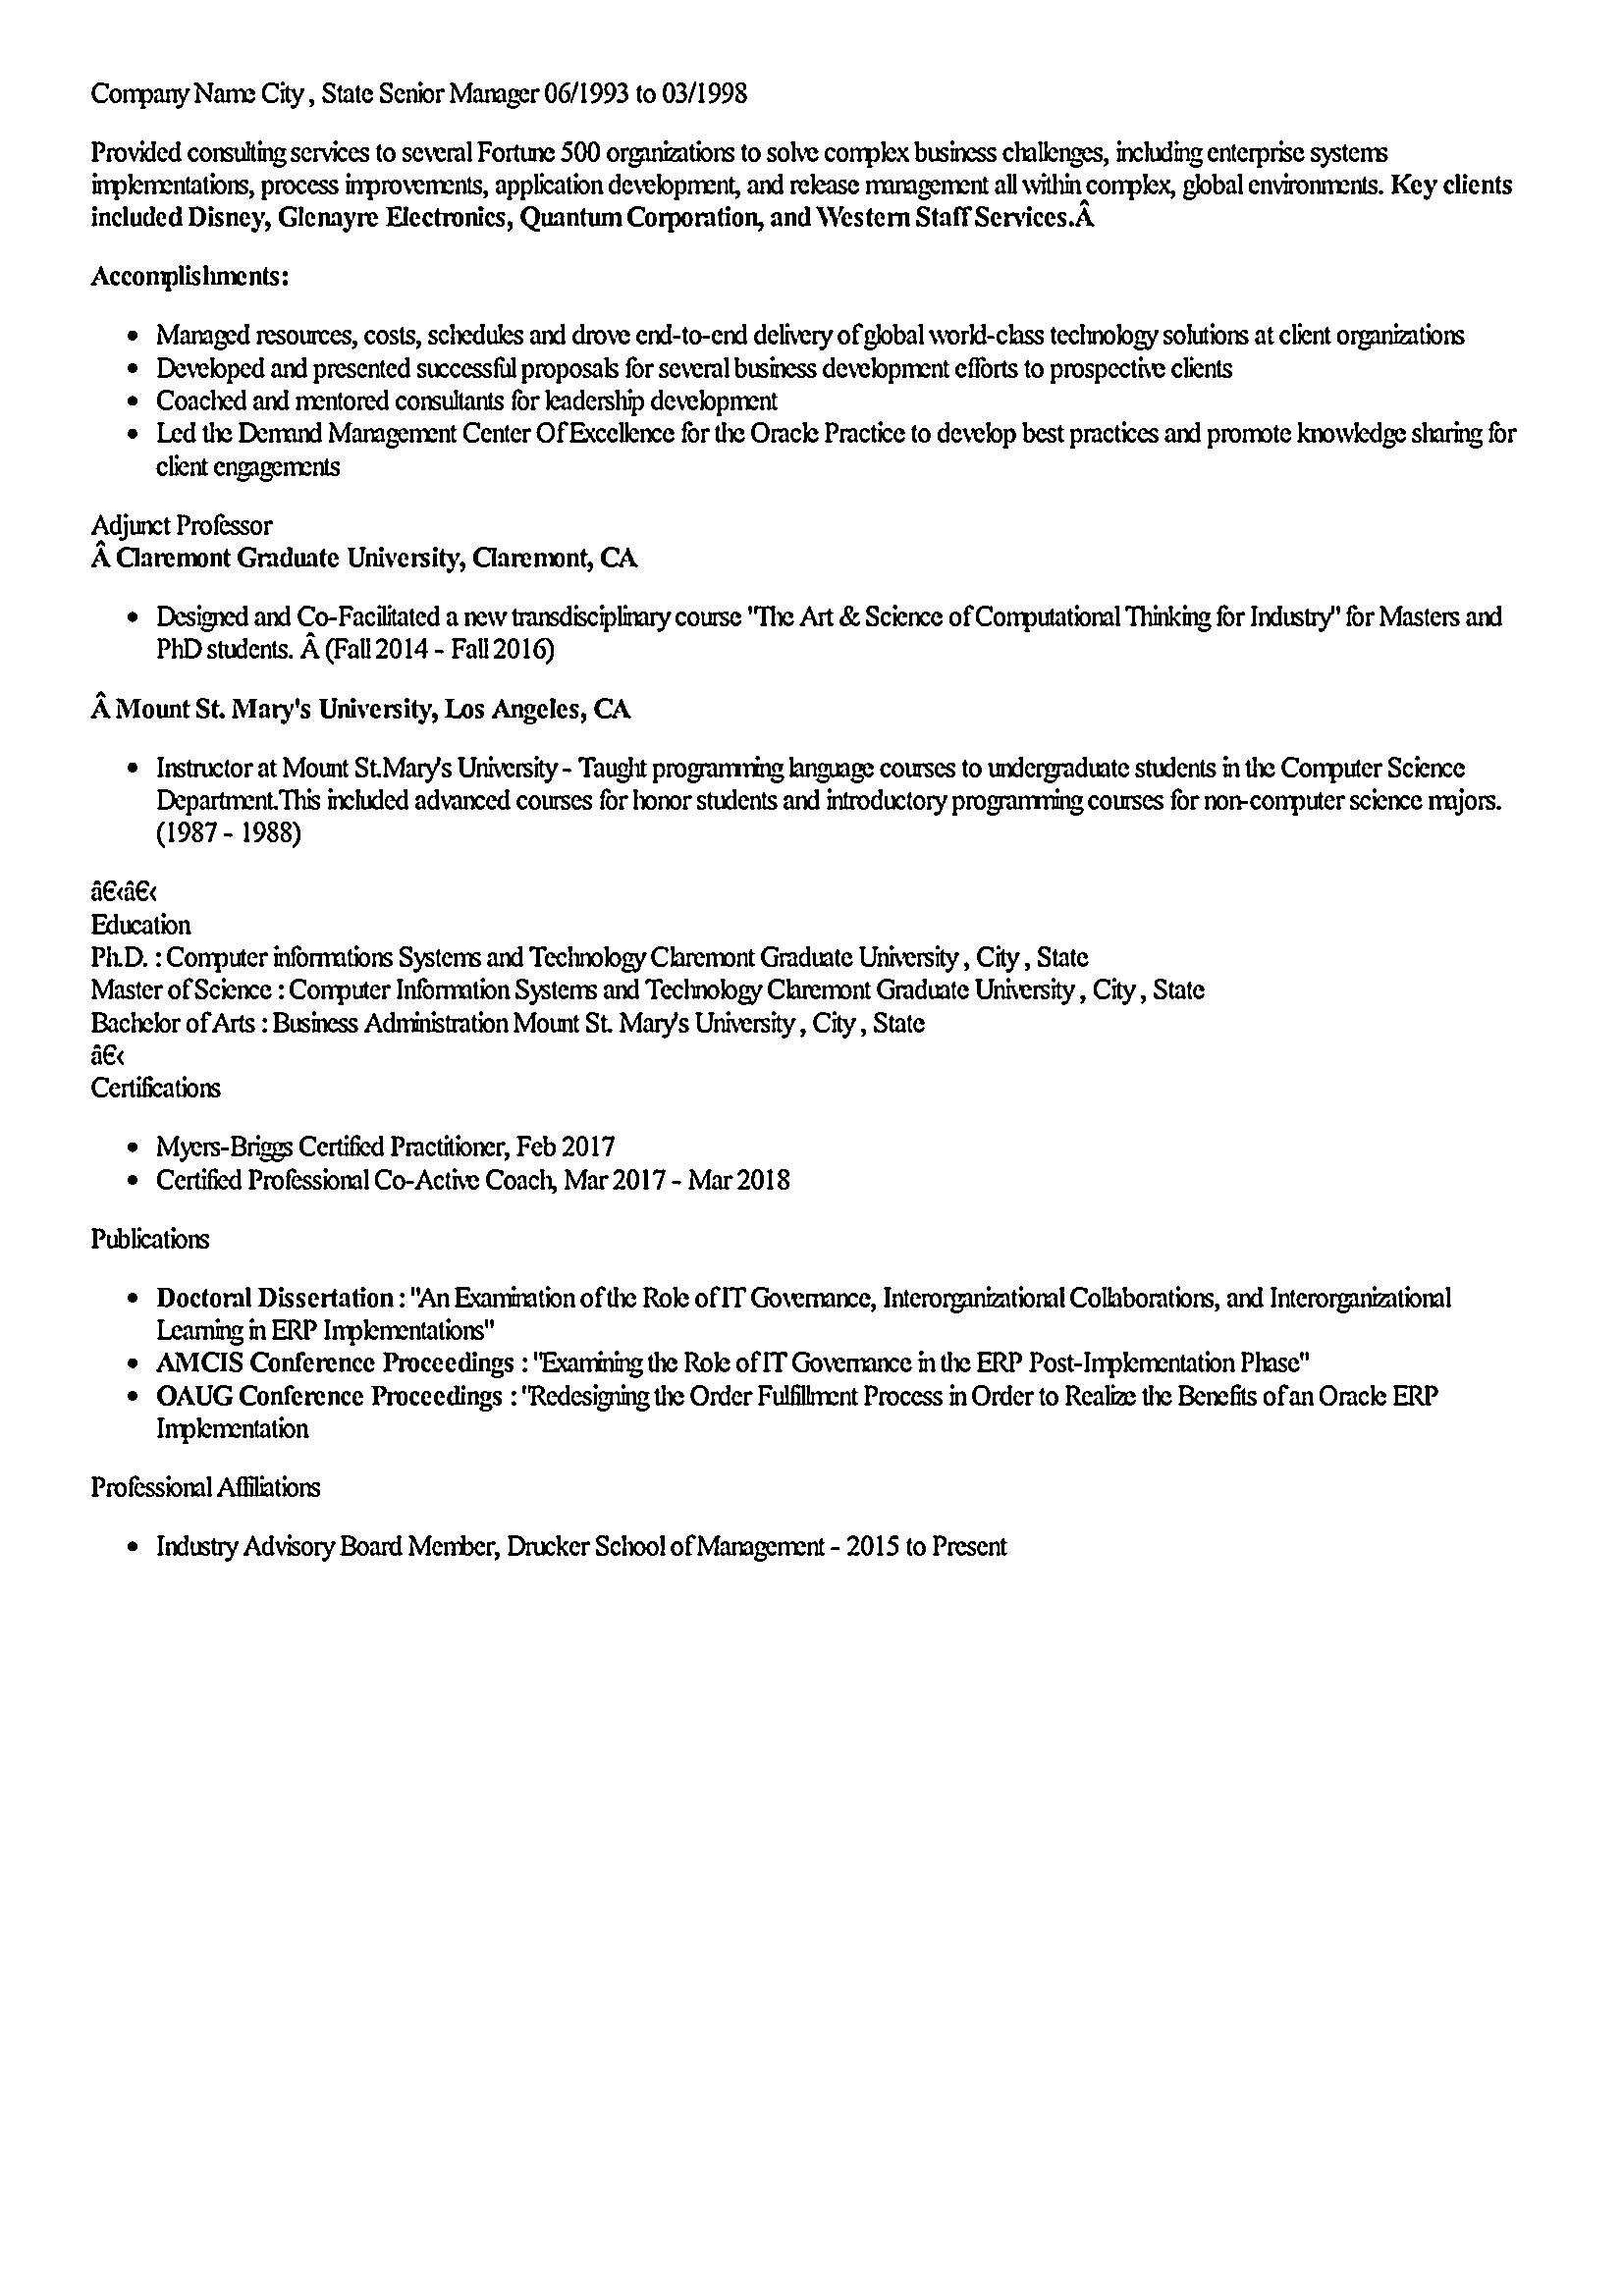

📝 Extracted Information:
{
    "name": "",
    "email": "",
    "phone": "",
    "skills": "consulting services, enterprise systems implementations, process improvements, application development, release management, resource management, cost management, schedule management, end-to-end delivery, global world-class technology solutions, business development, leadership development, demand management, Oracle Practice, best practices, knowledge sharing, course design, computational thinking, programming languages, IT Governance, Interorganizational Collaborations, ERP Implementations, Myers-Briggs Certified Practitioner, Co-Active Coaching, Oracle ERP, Order Fulfillment Process, Industry Advisory, Management",
    "education": "PhD: Computer Information Systems and Technology, Claremont Graduate University; Master of Science: Computer Information Systems and Technology, Claremont Graduate University; Bachelor of Arts: Business Administration, Mount St. Mary's University",
    "experience":

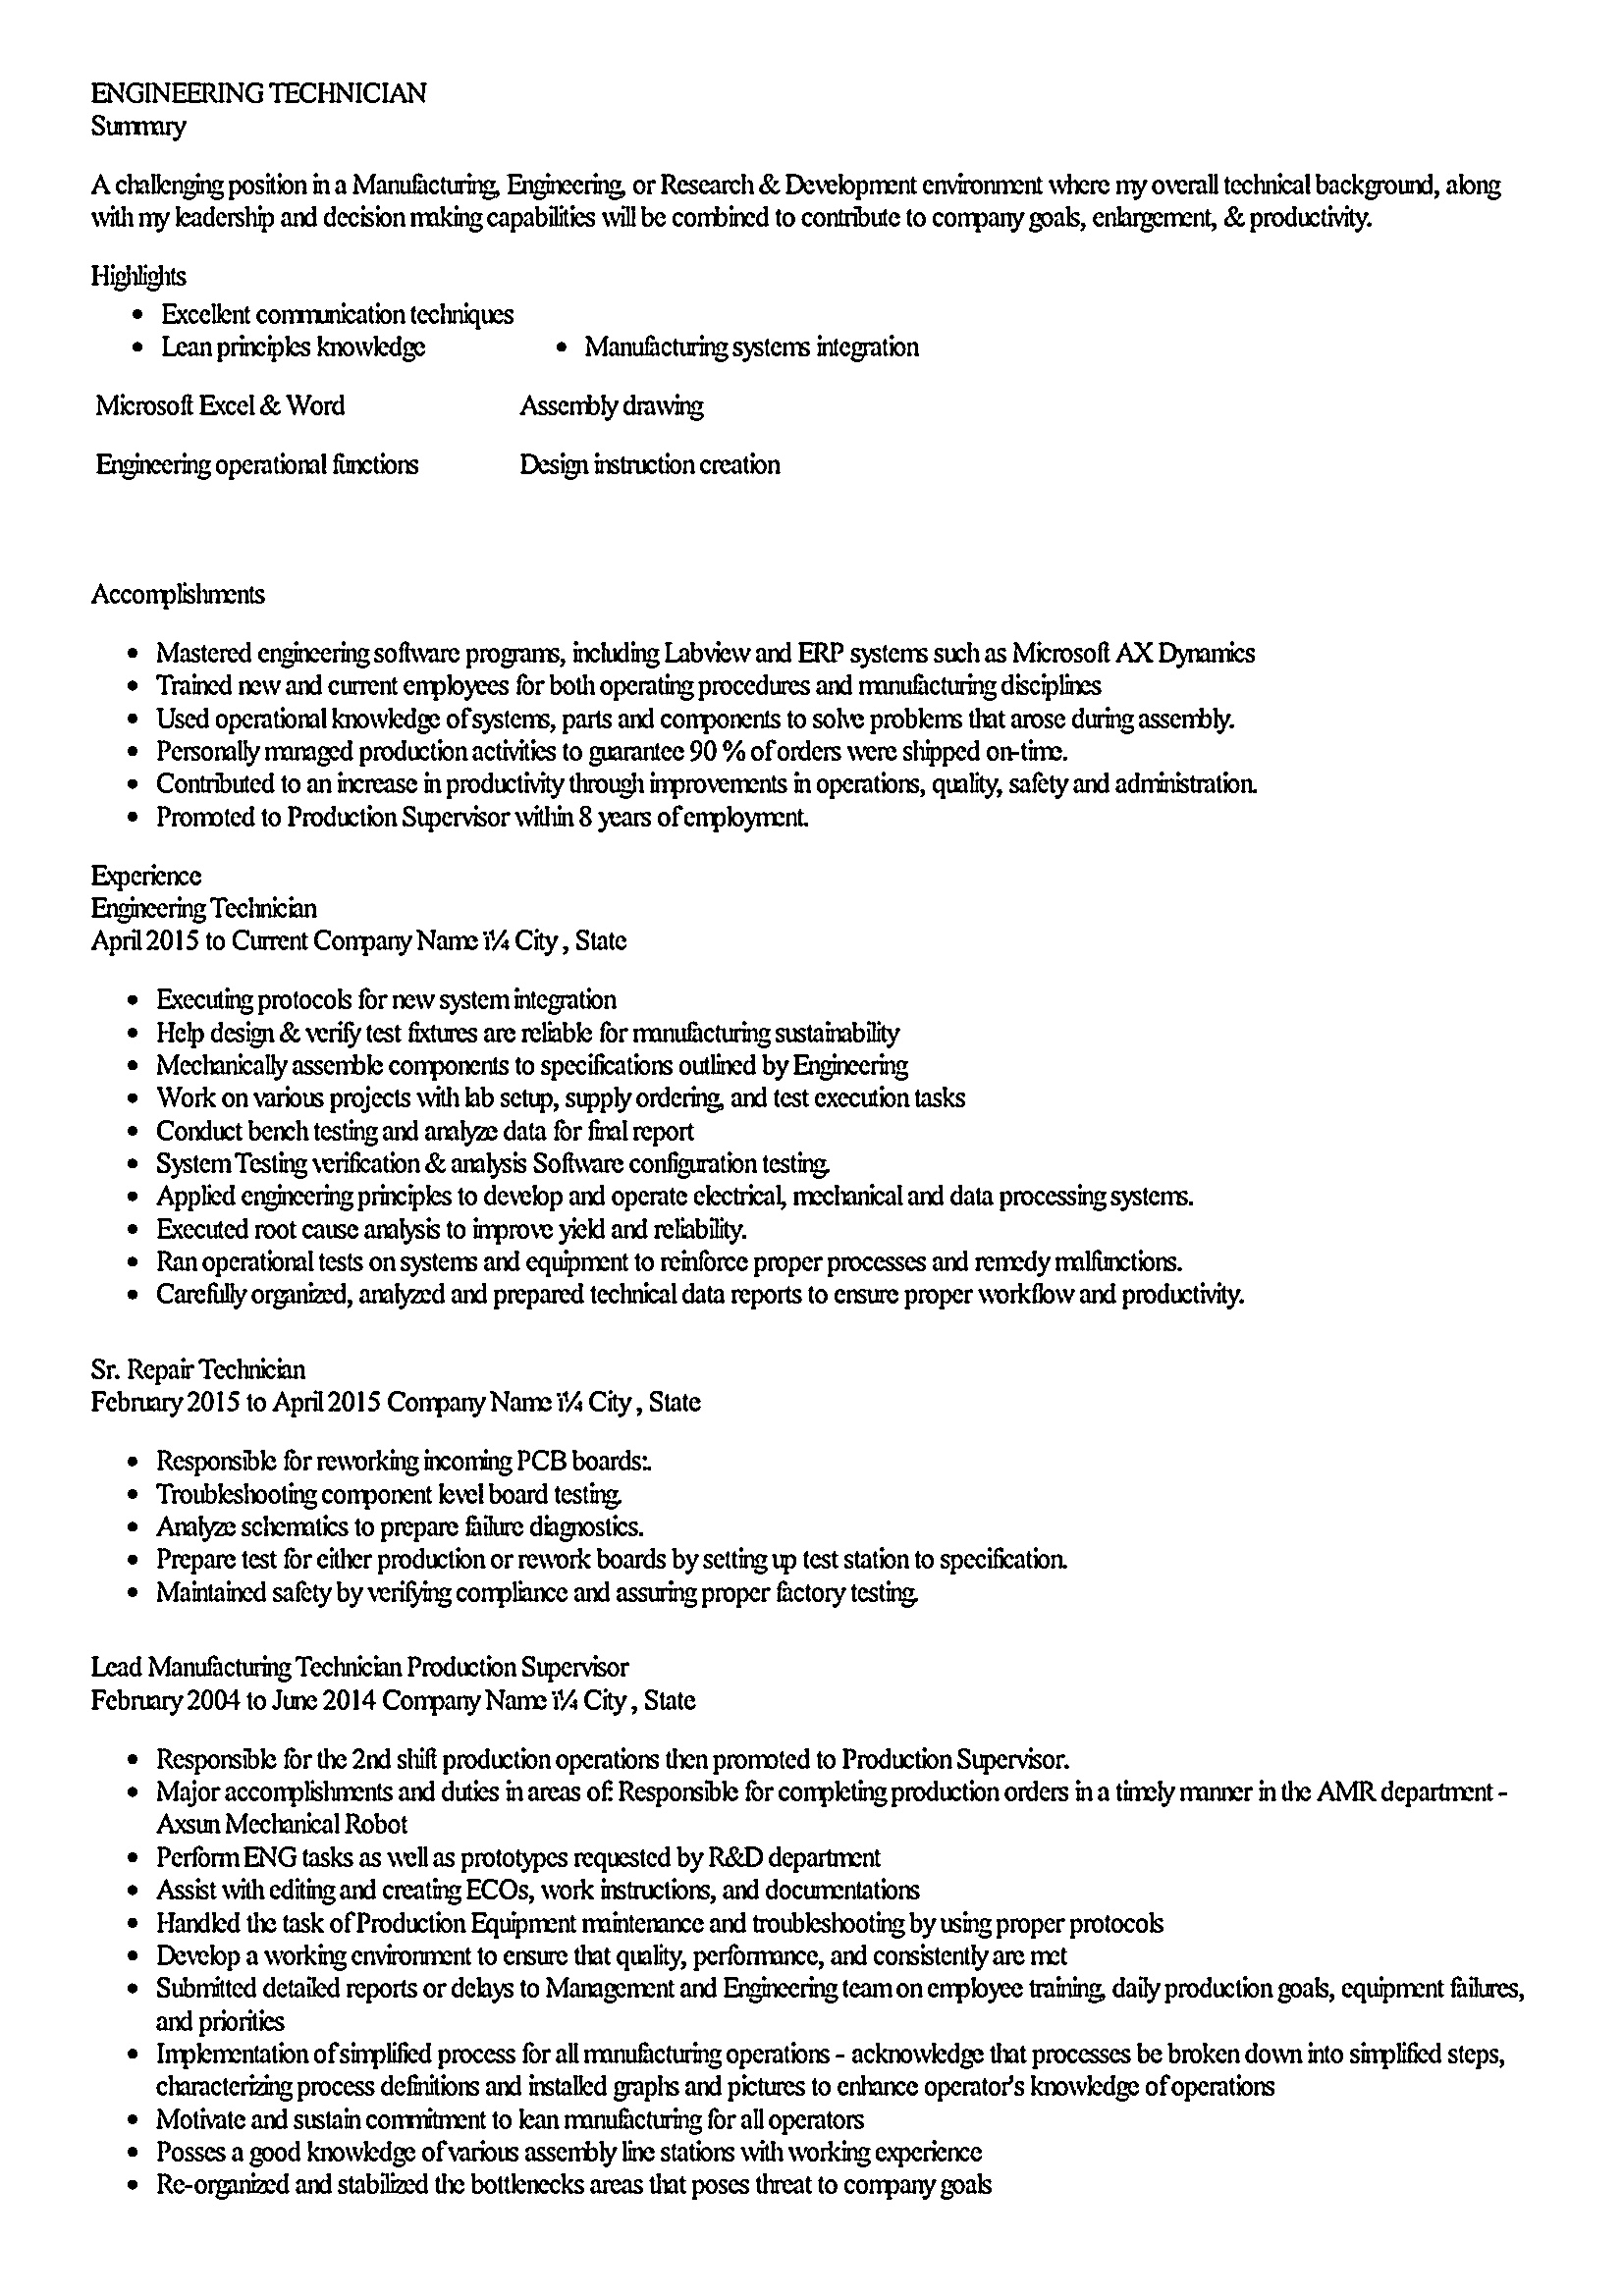

📝 Extracted Information:
{
    "name": "",
    "email": "",
    "phone": "",
    "skills": "Excellent communication techniques, Lean principles knowledge, Manufacturing systems integration, Microsoft Excel, Microsoft Word, Assembly drawing, Engineering operational functions, Design instruction creation, Labview, ERP systems (Microsoft AX Dynamics), Operational knowledge of systems, parts and components, Production management, System integration, Test fixture design & verification, Mechanical assembly, Bench testing, Data analysis, Software configuration testing, Electrical systems, Mechanical systems, Data processing systems, Root cause analysis, Operational tests, Technical data reporting, PCB rework, Component level board testing, Schematic analysis, Failure diagnostics, Production testing, Rework board testing, Factory testing, Production operations, AMR department (Axsun Mechanical Robot), ENG tasks, Prototyping, ECOs, Work instructions, Documentation, Production Equipment maintena

In [18]:
from IPython.display import display
from PIL import Image
import json
import os

# Paths
image_folder_path = "/content/preprocessed_images"
json_folder_path = "/content/json_output"

# Pick a few sample resumes to display
sample_images = os.listdir(image_folder_path)[:3]  # first 3 resumes

for image_name in sample_images:
    # Display preprocessed image
    image_path = os.path.join(image_folder_path, image_name)
    img = Image.open(image_path)
    print(f"\n📄 Resume Image: {image_name}")
    display(img)

    # Display extracted JSON
    json_path = os.path.join(json_folder_path, image_name.replace(".jpg", ".json"))
    if os.path.exists(json_path):
        with open(json_path, "r", encoding="utf-8") as f:
            extracted_data = json.load(f)
        print("📝 Extracted Information:")
        print(json.dumps(extracted_data, indent=4))
    else:
        print("⚠️ JSON output not found.")

    print("-"*80)
